In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from scipy import stats
from sklearn.model_selection import train_test_split
%matplotlib inline

# **EDA**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df=pd.read_csv(r'/content/drive/MyDrive/iot_ungdung/data_temp_hum_smoke.csv') # uploading data
df.head()

,Humidity,Temperature,Smoke,Status
0,40.5,28.3,800.0,0
1,42.5,28.3,800.0,0
2,42.6,28.4,800.0,0
3,39.6,28.4,800.0,0
4,42.7,28.4,800.0,0


In [ ]:
# for i in range(len(df['Detector'])):
#   if df['Detector'][i]=="OFF":
#     df['Detector'][i]=0
#   elif df['Detector'][i]=="ON" :
#     df['Detector'][i]=1
# df['Detector']

# Mục mới

# Mục mới

In [ ]:
# df = df.drop(['Unnamed: 0'],axis=1) # We are deleting the column because it does not carry useful information

In [ ]:
df.head()

,Humidity,Temperature,Smoke,Status
0,40.5,28.3,800.0,0
1,42.5,28.3,800.0,0
2,42.6,28.4,800.0,0
3,39.6,28.4,800.0,0
4,42.7,28.4,800.0,0


In [ ]:
df.info()# We look at the basic information on the dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11797 entries, 0 to 11796
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Humidity     11797 non-null  float64
 1   Temperature  11797 non-null  float64
 2   Smoke        11797 non-null  float64
 3   Status       11797 non-null  int64  
dtypes: float64(3), int64(1)
memory usage: 368.8 KB


In [ ]:
# for i in range(len(df['Status'])):
#   if df['Status'][i]== NULL:
#     # df['Detector'][i]=0
#     print(i)
df['Status']

0        0
1        0
2        0
3        0
4        0
        ..
11792    2
11793    2
11794    2
11795    2
11796    2
Name: Status, Length: 11797, dtype: int64

In [ ]:
df.describe()

,Humidity,Temperature,Smoke,Status
count,11797.000000,11797.000000,11797.000000,11797.000000
mean,52.370823,31.487344,4741.619338,0.955073
std,9.557353,3.200146,9740.470686,0.658061
min,32.800000,27.600000,800.000000,0.000000
25%,41.800000,28.500000,820.000000,1.000000
50%,56.100000,29.900000,940.000000,1.000000
75%,59.400000,35.200000,1566.000000,1.000000
max,67.100000,36.300000,44996.000000,2.000000


In [ ]:
df.nunique() # Number of unique values in each column

Humidity        294
Temperature      46
Smoke          3475
Status            3
dtype: int64

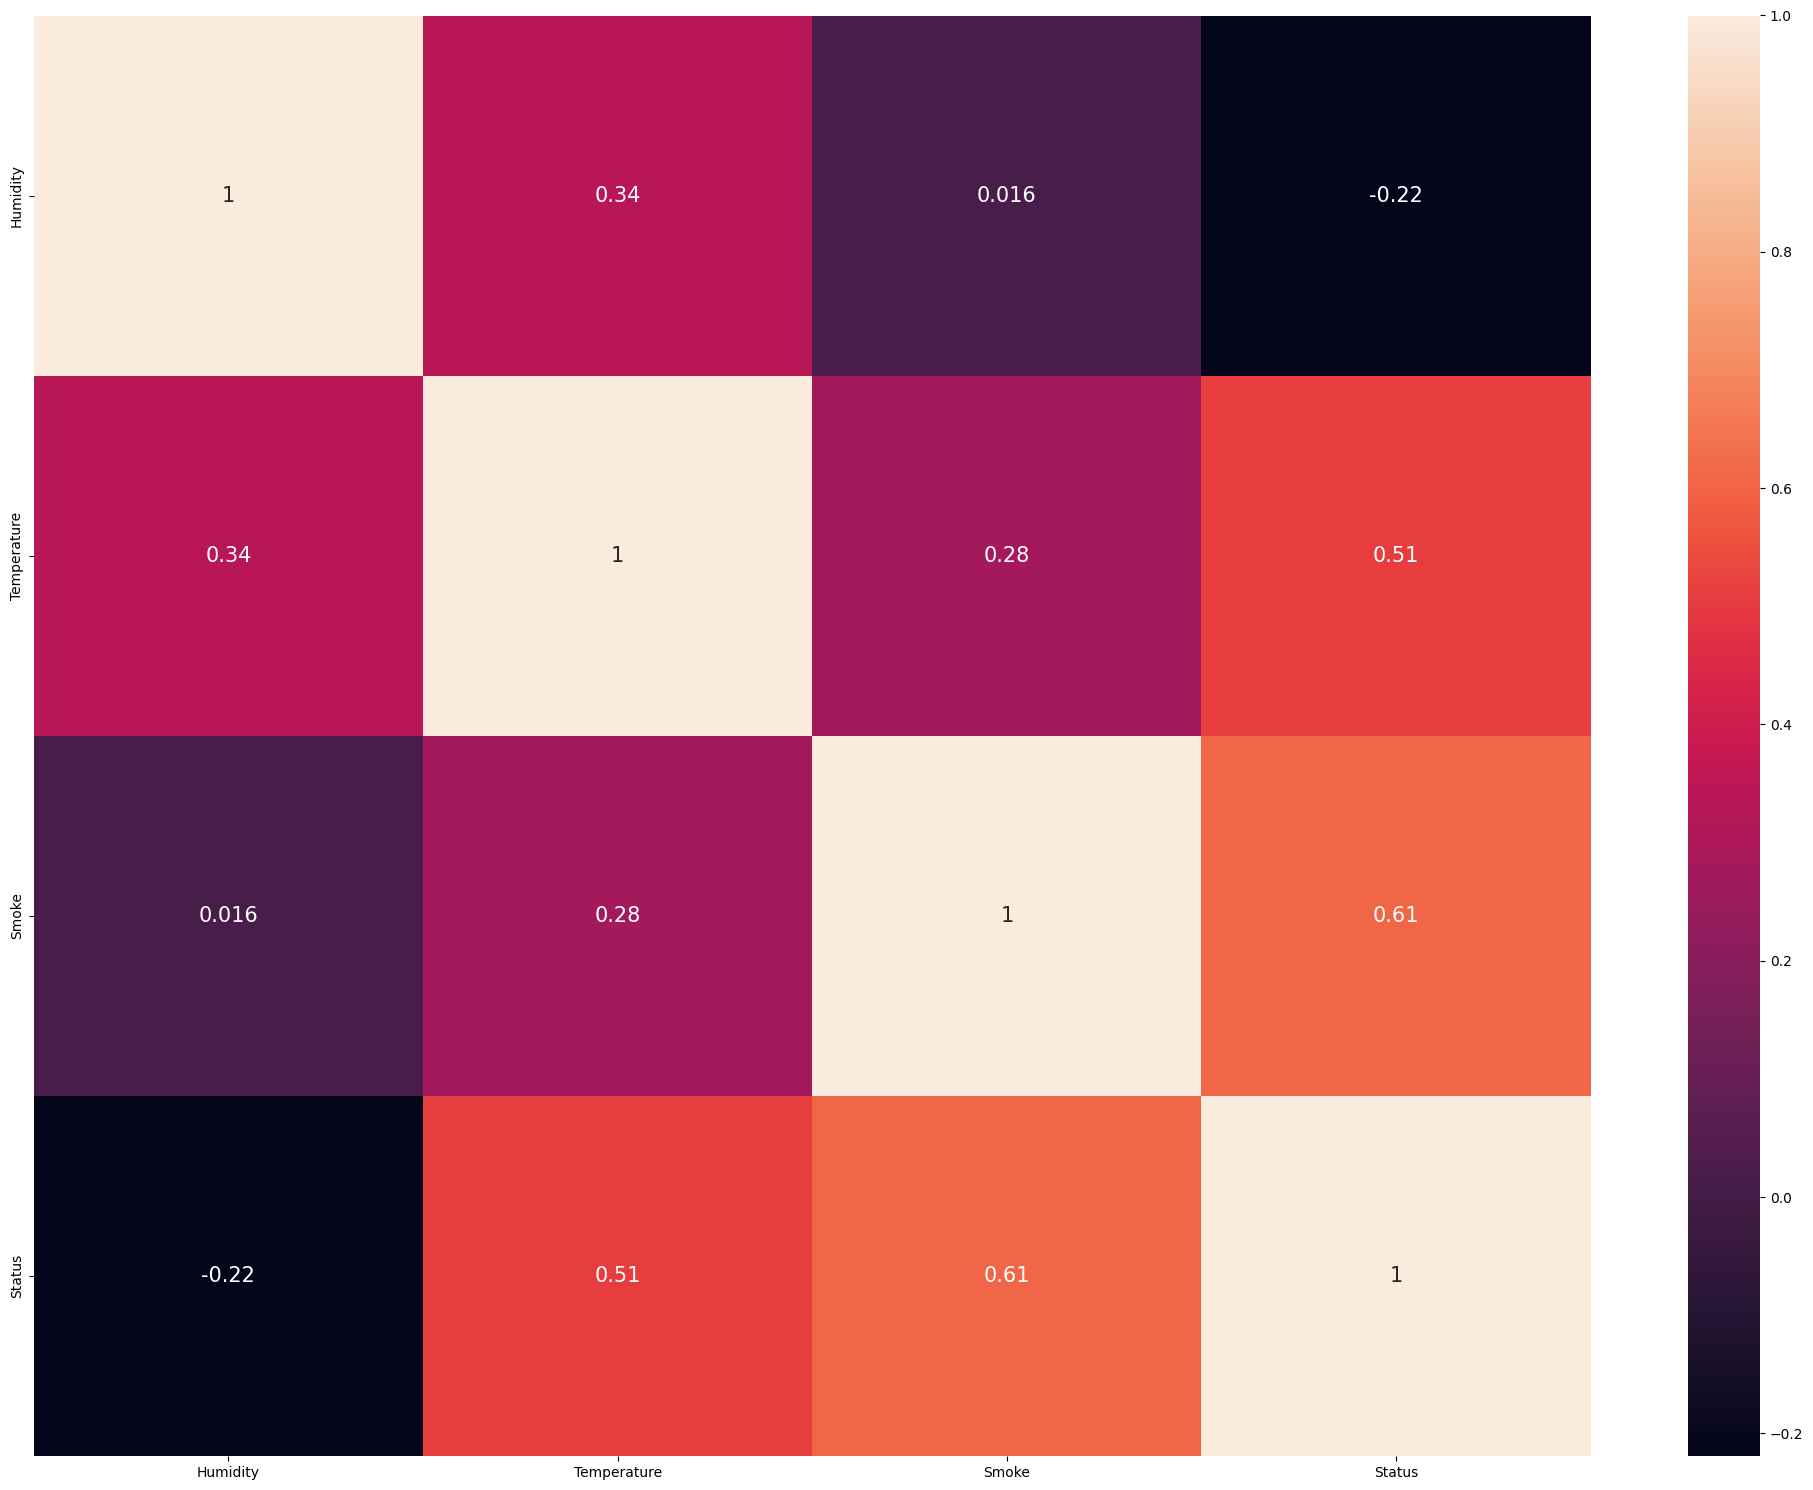

In [ ]:
# Correlation between features
fig, ax = plt.subplots(figsize=(20, 15))

sns.heatmap(df.corr(),annot=True, annot_kws={"size":15},)

fig.tight_layout()

<Axes: xlabel='Smoke', ylabel='Density'>

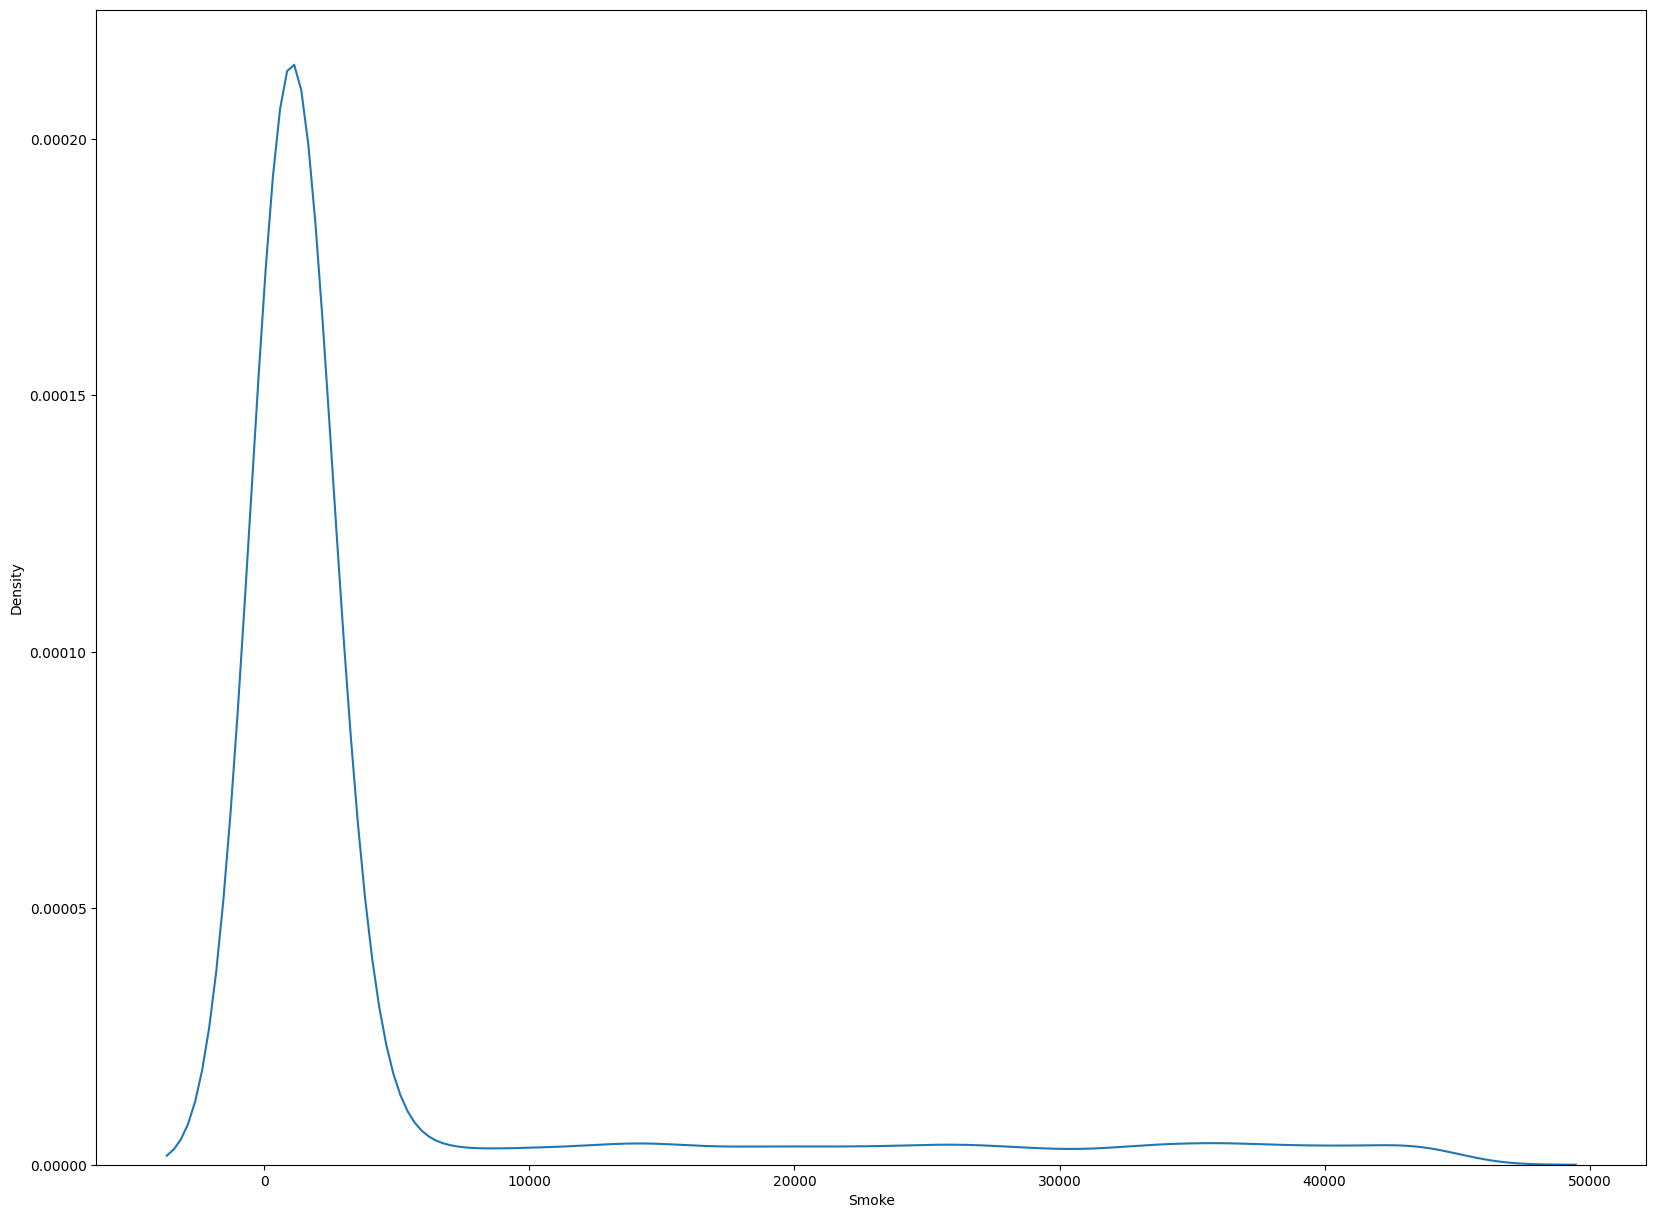

In [ ]:
fig, ax = plt.subplots(figsize=(20, 15))
sns.kdeplot(data =df,x = 'Smoke')

<Axes: xlabel='Temperature', ylabel='Density'>

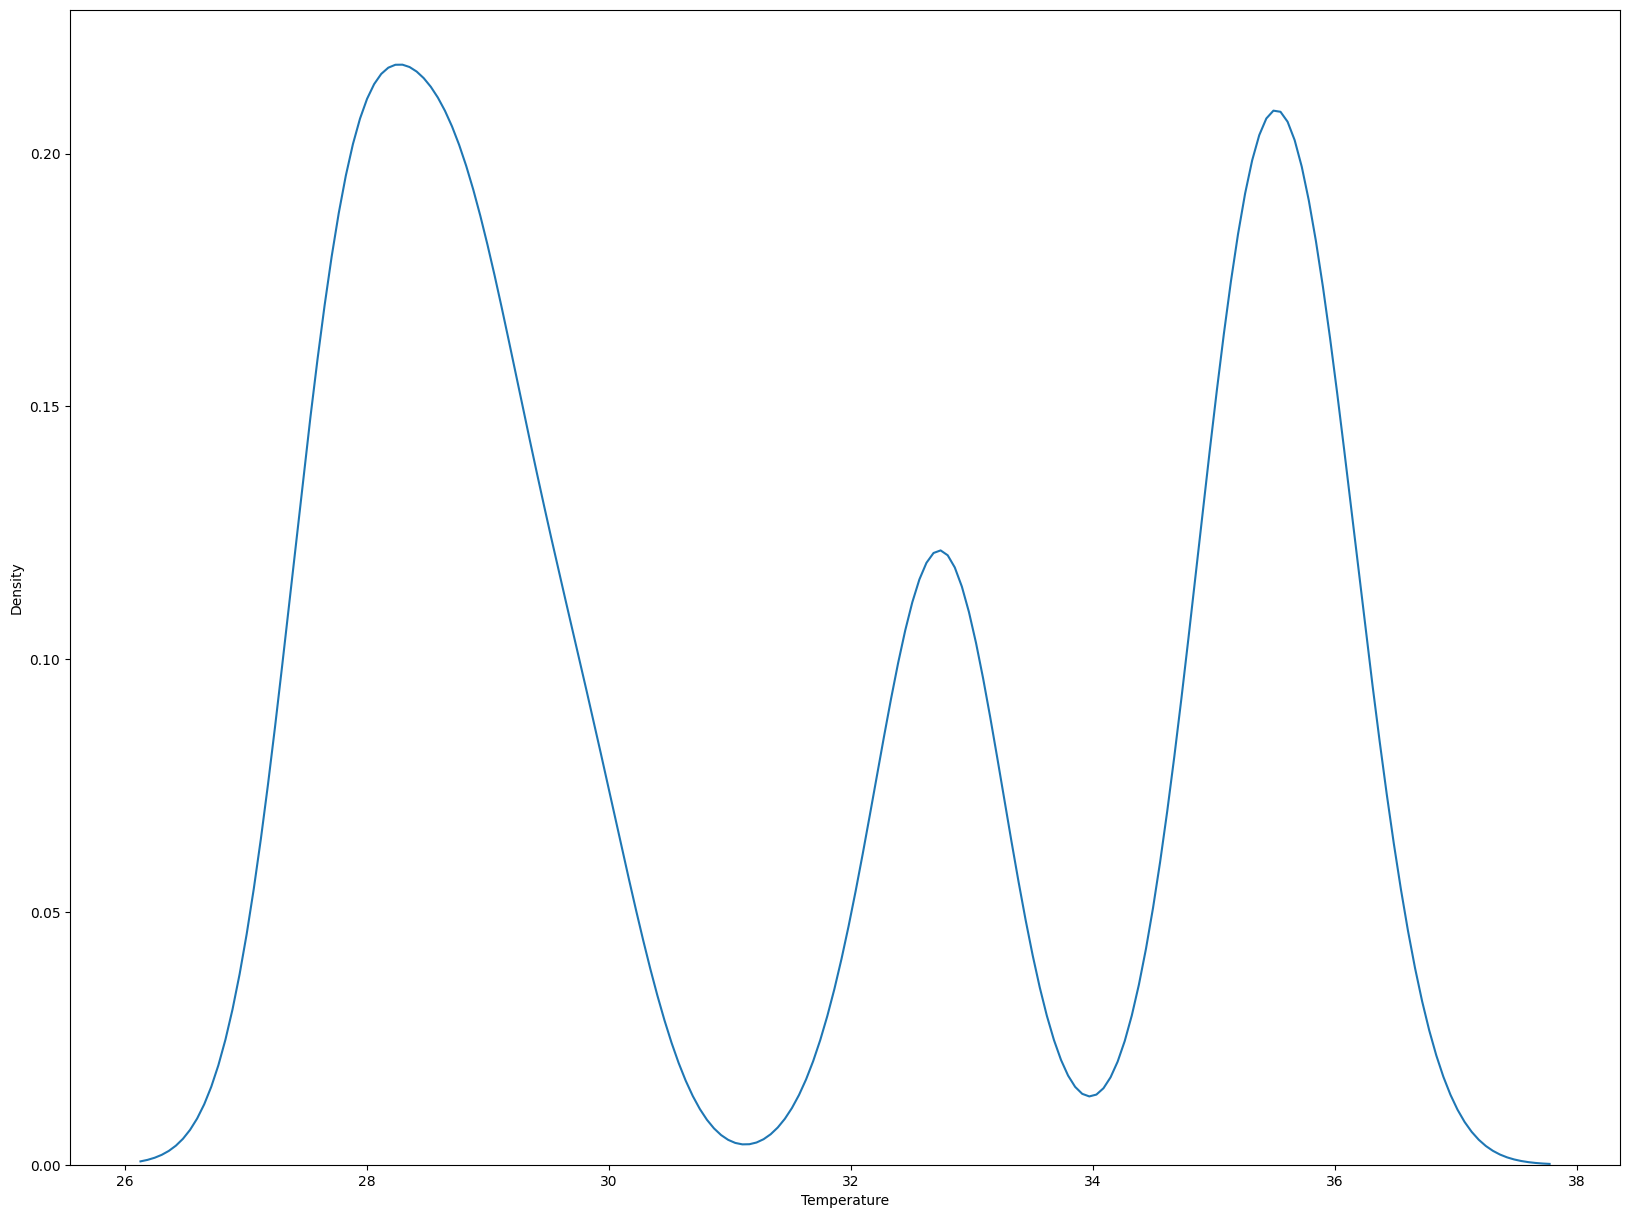

In [ ]:
fig, ax = plt.subplots(figsize=(20, 15))
sns.kdeplot(data = df,x = 'Temperature')

<Axes: xlabel='Humidity', ylabel='Density'>

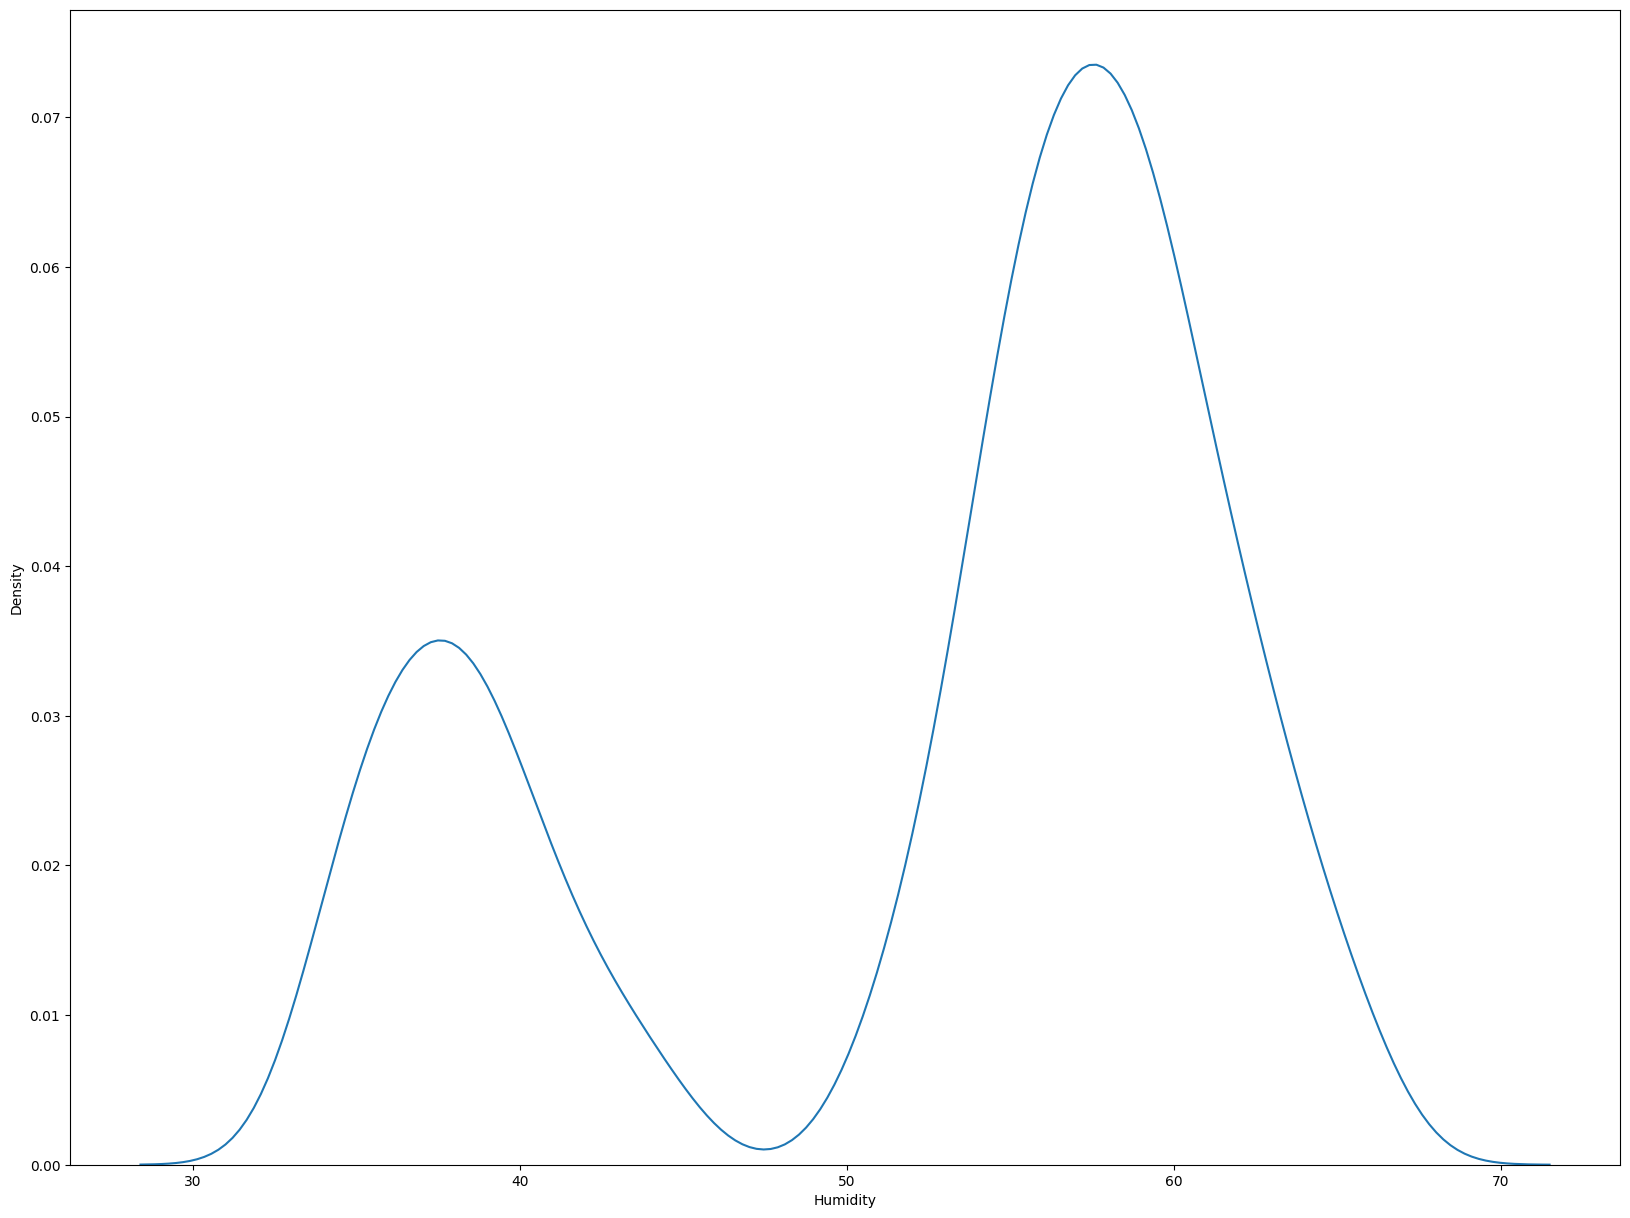

In [ ]:
fig, ax = plt.subplots(figsize=(20, 15))
sns.kdeplot(data = df,x = 'Humidity')

#  **Creating Models**

In [ ]:
# Spliting data into train and test
from sklearn.model_selection import train_test_split
X = df.drop(['Status'], axis=1).values.tolist()
y = df['Status'].values.tolist()
print(len(X))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)

type(X_train)

11797


list

#  1. Decision tree

In [ ]:
#Create a decision tree
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf.fit(X_train,y_train)
clf.score(X_test,y_test)

0.9726636999364272

In [ ]:
# Display the importance of features for a decision tree
feats = {}
for feature, importance in zip(X, clf.feature_importances_):
    feats[feature] = importance
importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Gini-Importance'})
importances = importances.sort_values(by='Gini-Importance', ascending=False)
importances = importances.reset_index()
importances = importances.rename(columns={'index': 'Features'})
sns.set(font_scale = 5)
sns.set(style="whitegrid", color_codes=True, font_scale = 1.7)
fig, ax = plt.subplots()
fig.set_size_inches(20,10)
sns.barplot(x=importances['Gini-Importance'], y=importances['Features'], data=importances, color='skyblue')
plt.xlabel('Importance', fontsize=25, weight = 'bold')
plt.ylabel('Features', fontsize=25, weight = 'bold')
plt.title('Feature Importance(decision tree)', fontsize=25, weight = 'bold')
plt.show()
print(importances)

In [ ]:
# Predicting
predicted_clf = clf.predict(X_test)
pd.Series(predicted_clf)

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, predicted_clf))

# 2. RandomForest

In [ ]:
#Create a random forest
from sklearn.ensemble import RandomForestClassifier
clf_rf = RandomForestClassifier()
clf_rf.fit(X_train,y_train)
clf_rf.score(X_test,y_test)

In [ ]:
# Display the importance of features for a random forest
feats = {}
for feature, importance in zip(X, clf_rf.feature_importances_):
    feats[feature] = importance
importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Gini-Importance'})
importances = importances.sort_values(by='Gini-Importance', ascending=False)
importances = importances.reset_index()
importances = importances.rename(columns={'index': 'Features'})
sns.set(font_scale = 5)
sns.set(style="whitegrid", color_codes=True, font_scale = 1.7)
fig, ax = plt.subplots()
fig.set_size_inches(20,10)
sns.barplot(x=importances['Gini-Importance'], y=importances['Features'], data=importances, color='skyblue')
plt.xlabel('Importance', fontsize=25, weight = 'bold')
plt.ylabel('Features', fontsize=25, weight = 'bold')
plt.title('Feature Importance(random forest)', fontsize=25, weight = 'bold')
plt.show()
print(importances)

In [ ]:
# Predicting
predicted_clf_rf = clf_rf.predict(X_test)
pd.Series(predicted_clf_rf)

In [ ]:
print(classification_report(y_test, predicted_clf_rf))

# 3. CatBoost

In [ ]:
!pip install catboost

In [ ]:
# Create a CatBoostClassifier
from catboost import CatBoostClassifier
cat = CatBoostClassifier()
cat.fit(X_train,y_train)

In [ ]:
cat.score(X_test,y_test)

In [ ]:
# Predicting
predicted_cat = cat.predict(X_test)
pd.Series(predicted_cat)

In [ ]:
print(classification_report(y_test, predicted_cat))

# **ROC curves**

In [ ]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, predicted_clf)
fpr1 , tpr1, thresholds1 = roc_curve(y_test, predicted_clf_rf)
fpr2 , tpr2, thresholds2 = roc_curve(y_test, predicted_cat)
roc_auc= auc(fpr, tpr)
plt.figure(figsize=(20, 15))
plt.plot(fpr, tpr, color='darkorange',
         lw=3, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot(fpr1, tpr1, color='green',
         lw=3, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot(fpr2, tpr2, color='red',
         lw=3, label='ROC curve (area = %0.2f)' % roc_auc)

plt.plot([0, 1], [0, 1], color='navy', lw=3, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.tight_layout()

In [ ]:
import pickle
pickle.dump(clf, open("filename.pickle", "wb"))

In [ ]:
loaded_model = pickle.load(open("filename.pickle", "rb"))
loaded_model

In [ ]:
# you can use loaded model to compute predictions
# T = [0, 0, 0, 0, 0]
T = [[50, 50, 1300]]
y_predicted = loaded_model.predict(T)
print(y_predicted)
type(X)